In [1]:
# Importing spreadsheet u_cars_prices_10_098.xlsx data cleaning
# Step 1
#

from google.colab import files
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import io

# Upload the file
uploaded = files.upload()

# Read the uploaded file into a DataFrame
file_name = list(uploaded.keys())[0]
df = pd.read_excel('u_cars_prices_10_098.xlsx')
print(df)
print(df.head())


#123 MPG MIN and MAX with 0 or na with mean value
df['MPG MIN'] = df.groupby('Engine Volume (L)')['MPG MIN'].transform(lambda x: x.fillna(x.mean()))
df['MPG MAX'] = df.groupby('Engine Volume (L)')['MPG MAX'].transform(lambda x: x.fillna(x.mean()))

df['MPG MIN'] = df.groupby('Engine Volume (L)')['MPG MIN'].transform(lambda x: x.replace(0, x.mean()))
df['MPG MAX'] = df.groupby('Engine Volume (L)')['MPG MAX'].transform(lambda x: x.replace(0, x.mean()))

df['MPG MIN'] = df.groupby('Engine Volume (L)')['MPG MIN'].transform(lambda x: x.fillna(x.mean()))
df['MPG MAX'] = df.groupby('Engine Volume (L)')['MPG MAX'].transform(lambda x: x.fillna(x.mean()))


#df['Engine Volume (L)'] = df.groupby('Manufacturer')['Engine Volume (L)'].transform(lambda x: x.fillna(x.mean()))
df['Seller Rating'] = df.groupby('Manufacturer')['Seller Rating'].transform(lambda x: x.fillna(x.mean().round(1)))
df['Seller Reviews Count'] = df.groupby('Manufacturer')['Seller Reviews Count'].transform(lambda x: x.fillna(x.mean().round(0)))
df['Car Rating'] = df.groupby('Manufacturer')['Car Rating'].transform(lambda x: x.fillna(x.mean()))
df['Car Reviews Count'] = df.groupby('Manufacturer')['Car Reviews Count'].transform(lambda x: x.fillna(x.mean()))
df['Car Recommendation Rate'] = df.groupby('Manufacturer')['Car Recommendation Rate'].transform(lambda x: x.fillna(x.mean()))
df['Car Comfort Rating'] = df.groupby('Manufacturer')['Car Comfort Rating'].transform(lambda x: x.fillna(x.mean()))
df['Car Interior Rating'] = df.groupby('Manufacturer')['Car Interior Rating'].transform(lambda x: x.fillna(x.mean()))
df['Car Performance Rating'] = df.groupby('Manufacturer')['Car Performance Rating'].transform(lambda x: x.fillna(x.mean()))
df['Car Value Rating'] = df.groupby('Manufacturer')['Car Value Rating'].transform(lambda x: x.fillna(x.mean()))
df['Car Exterior Rating'] = df.groupby('Manufacturer')['Car Exterior Rating'].transform(lambda x: x.fillna(x.mean()))
df['Car Reliability Rating']  = df.groupby('Manufacturer')['Car Reliability Rating'].transform(lambda x: x.fillna(x.mean()))

# Convert Engine Volume from Cubic to Liters
df['Engine Volume (L)'] = df['Engine Volume (L)'].replace(440, 6.8)
df['Engine Volume (L)'] = df['Engine Volume (L)'].replace(400, 6.3)
df['Engine Volume (L)'] = df['Engine Volume (L)'].replace(348, 5.0)
df['Engine Volume (L)'] = df['Engine Volume (L)'].replace(1600, 1.6)

# drop rows if values is missing for Manufacturer or Price (USD)
df = df.dropna(subset=['Manufacturer'])
df = df.dropna(subset=['Price (USD)'])
df = df.dropna(subset=['Engine Volume (L)'])

display(df.head(30))


Saving u_cars_prices_10_098.xlsx to u_cars_prices_10_098.xlsx
       Manufacturer    Year  Price (USD)  MPG MIN  MPG MAX  Engine Volume (L)  \
0           Hyundai  2022.0      29691.0      NaN      NaN                2.5   
1              MINI  2016.0       9500.0     25.0     35.0                1.5   
2        Mitsubishi  2022.0      20999.0     25.0     26.0                1.5   
3              FIAT  2013.0       5999.0     31.0     34.0                1.4   
4              Jeep  2023.0      26304.0     23.0     29.0                1.3   
...             ...     ...          ...      ...      ...                ...   
7934           Ford  2019.0      26988.0     17.0     22.0                3.5   
7935            RAM  2016.0      17900.0      NaN      NaN                3.6   
7936        Hyundai  2022.0      26998.0     22.0     25.0                NaN   
7937           Ford  2021.0      30973.0     19.0     19.0                2.3   
7938  Mercedes-Benz  2016.0      42995.0     15

,Manufacturer,Year,Price (USD),MPG MIN,MPG MAX,Engine Volume (L),Mileage,Accidents or damage,Seller Rating,Seller Reviews Count,Car Rating,Car Reviews Count,Car Recommendation Rate,Car Comfort Rating,Car Interior Rating,Car Performance Rating,Car Value Rating,Car Exterior Rating,Car Reliability Rating
0,Hyundai,2022.0,29691.0,25.270736,30.909233,2.5,36007.0,1.0,3.5,855.0,4.200000,37.000000,75.000000,4.200000,4.100000,4.300000,3.700000,4.500000,4.200000
1,MINI,2016.0,9500.0,25.000000,35.000000,1.5,104753.0,0.0,3.2,17.0,4.800000,12.000000,91.000000,4.800000,4.700000,4.900000,4.600000,4.900000,4.700000
2,Mitsubishi,2022.0,20999.0,25.000000,26.000000,1.5,60922.0,0.0,2.7,513.0,4.600000,9.000000,88.000000,4.600000,4.400000,4.400000,4.600000,4.600000,4.300000
3,FIAT,2013.0,5999.0,31.000000,34.000000,1.4,78996.0,0.0,4.3,4.0,4.500000,124.000000,88.000000,4.200000,4.500000,4.400000,4.400000,4.700000,4.400000
4,Jeep,2023.0,26304.0,23.000000,29.000000,1.3,1075.0,0.0,3.9,324.0,5.000000,2.000000,100.000000,5.000000,5.000000,4.500000,5.000000,5.000000,5.000000
6,Jeep,2015.0,10900.0,21.000000,29.000000,3.2,134237.0,0.0,4.5,0.0,4.400000,326.000000,84.000000,4.600000,4.600000,4.400000,4.300000,4.600000,4.400000
7,Subaru,2019.0,20299.0,27.000000,33.000000,2.0,53481.0,0.0,4.7,192.0,4.700000,208.000000,94.000000,4.700000,4.700000,4.600000,4.700000,4.800000,4.800000
8,Toyota,2018.0,23995.0,30.170370,33.411111,1.8,55321.0,0.0,4.5,191.0,4.700000,48.000000,95.000000,4.600000,4.400000,4.800000,4.600000,4.600000,4.800000
9,Lincoln,2003.0,4695.0,17.000000,25.000000,4.6,143131.0,1.0,2.3,116.0,4.700000,33.000000,100.000000,4.800000,4.600000,4.600000,4.700000,4.600000,4.800000
10,Lexus,2006.0,6999.0,31.000000,27.000000,3.3,185341.0,0.0,4.6,212.0,4.600000,65.000000,87.000000,4.900000,4.600000,4.700000,4.500000,4.600000,4.600000


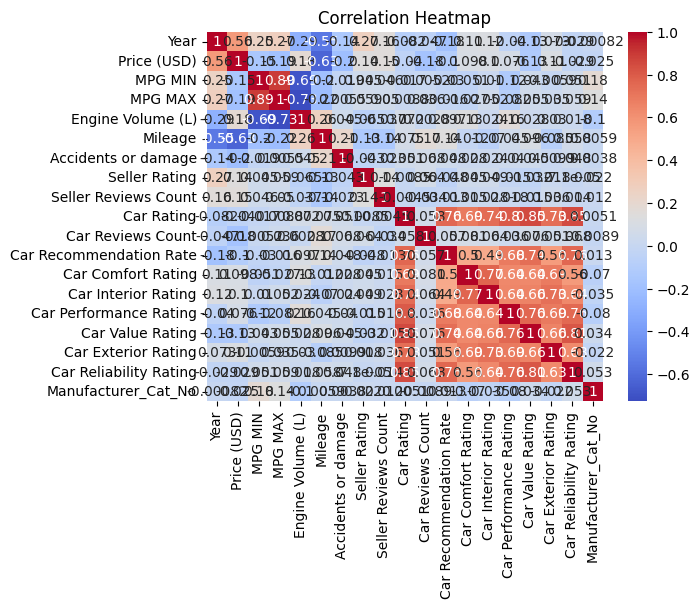

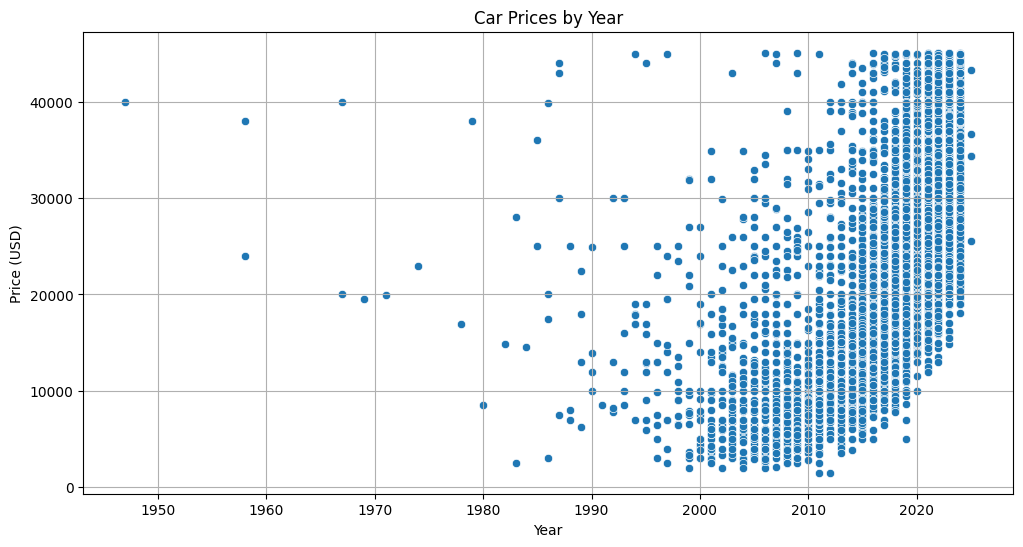

,Manufacturer,Year,Price (USD),MPG MIN,MPG MAX,Engine Volume (L),Mileage,Accidents or damage,Seller Rating,Seller Reviews Count,Car Rating,Car Reviews Count,Car Recommendation Rate,Car Comfort Rating,Car Interior Rating,Car Performance Rating,Car Value Rating,Car Exterior Rating,Car Reliability Rating,Manufacturer_Cat_No
33,Nissan,2017,35995.0,18.0,26.0,3.7,20152.0,1.0,4.0,209.0,4.8,19.0,100.0,4.2,4.5,4.9,4.6,5.0,5.0,39
78,Land,2016,39997.0,15.0,19.0,3.0,34455.0,0.0,4.9,273.0,4.3,22.0,77.0,4.6,4.4,4.4,4.0,4.7,4.0,29
79,Mercury,2003,42999.0,17.0,21.0,4.6,35650.0,0.0,5.0,5.0,4.8,23.0,95.0,4.8,4.6,4.9,4.6,4.6,4.8,35
92,Chevrolet,2010,28588.0,16.0,24.0,6.2,13462.0,0.0,4.4,18.0,4.6,214.0,93.0,4.4,4.3,4.8,4.5,4.8,4.6,10
101,Porsche,2005,26980.0,17.0,25.0,3.2,31950.0,0.0,4.2,22.0,4.8,36.0,88.0,4.4,4.7,4.9,4.7,5.0,4.5,44


(7048, 20)

In [2]:
# Create new feature Manfacture_Cat_No from Manufacture, heat map, and plot Car Prices by Year
# Step 2
#

Manfacture_Cat_No = {'Acura' : 1, 'Alfa': 2, 'Aston' : 3, 'Audi' : 4, 'Austin-Healey' : 5, 'Bentley' : 6, 'BMW' : 7, 'Buick' : 8, 'Cadillac' : 9, 'Chevrolet' : 10, 'Chrysler' : 11,
'Datsun' : 12, 'Dodge' : 13, 'FIAT' : 14, 'Fisker' : 15, 'Ford' : 16, 'Genesis' : 17, 'Geo' : 18, 'GMC' : 19, 'Honda' : 20, 'Hummer' : 21, 'Hyundai' : 22, 'INFINITI' : 23,
'Isuzu' : 24, 'Jaguar': 25, 'Jeep' : 26, 'Kaiser' : 27, 'Kia' : 28, 'Land' : 29, 'Lexus' : 30, 'Lincoln' : 31, 'Maserati' : 32, 'Mazda' : 33, 'Mercedes-Benz' : 34, 'Mercury' : 35,
'MG' :36, 'MINI' : 37, 'Mitsubishi' : 38, 'Nissan' : 39, 'Oldsmobile' : 40, 'Plymouth' : 41, 'Polestar' : 42, 'Pontiac' : 43, 'Porsche' : 44, 'RAM' : 45, 'Rolls-Royce' : 46,
'Saab' : 47, 'Saturn' : 48, 'Scion' : 49, 'smart' : 50, 'Subaru' : 51, 'Suzuki' : 52, 'Tesla' : 53, 'Toyota' : 54, 'Volkswagen' : 55, 'Volvo' : 56 }

df['Manufacturer_Cat_No'] = df['Manufacturer'].map(Manfacture_Cat_No)

df_heat = df.drop('Manufacturer', axis=1).corr()
sns.heatmap(df_heat, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

#scatter plot used cars Year(X) and Car Prices (USD) (Y)
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Year', y='Price (USD)')
plt.title('Car Prices by Year')
plt.xlabel('Year')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()

df['Year'] = df['Year'].dropna().astype(int)
q1 = df.groupby('Year')['Price (USD)'].transform(lambda x: x.quantile(0.25))
q3 = df.groupby('Year')['Price (USD)'].transform(lambda x: x.quantile(0.75))
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers_df = df[(df['Price (USD)'] < lower_bound) | (df['Price (USD)'] > upper_bound)]
display(outliers_df.head())

df.shape





In [3]:
# Remove Outlier Samples
# Correlation Matrix
# Step 3
#

df = df[df['Year'] > 2009]
df = df[df['Year'] < 2024]
df = df[df['Price (USD)'] > 9000]
df = df[df['Engine Volume (L)'] < 9]
df = df[df['Mileage'] < 400000]
display(df.describe())
display(df.head(30))
# Calculate the correlation matrix for only numerical columns
correlation_matrix = df.select_dtypes(include=['number']).corr()

# Display the correlations with 'Price (USD)'
display(correlation_matrix['Price (USD)'].sort_values(ascending=False))


df.shape

,Year,Price (USD),MPG MIN,MPG MAX,Engine Volume (L),Mileage,Accidents or damage,Seller Rating,Seller Reviews Count,Car Rating,Car Reviews Count,Car Recommendation Rate,Car Comfort Rating,Car Interior Rating,Car Performance Rating,Car Value Rating,Car Exterior Rating,Car Reliability Rating,Manufacturer_Cat_No
count,5617.000000,5617.000000,5615.000000,5615.000000,5617.000000,5617.000000,5603.000000,5617.000000,5617.000000,5617.000000,5617.000000,5617.000000,5617.000000,5617.000000,5617.000000,5617.000000,5617.000000,5617.000000,5617.000000
mean,2019.118391,24455.239808,21.735264,28.123984,2.864866,62010.226277,0.310905,4.433594,201.428699,4.551049,75.355554,88.033910,4.627175,4.594062,4.540137,4.425536,4.698807,4.554690,25.125156
std,3.156649,8818.696786,6.744381,6.850906,1.228971,37201.336996,0.462905,0.395526,230.590363,0.440989,112.926490,12.105774,0.344061,0.344030,0.406497,0.425737,0.291460,0.434713,15.118189
min,2010.000000,9093.000000,0.000000,0.000000,0.000000,116.000000,0.000000,1.100000,0.000000,1.000000,2.000000,13.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2017.000000,17488.000000,18.000000,24.000000,2.000000,32747.000000,0.000000,4.300000,20.000000,4.400000,12.000000,84.884876,4.500000,4.500000,4.400000,4.300000,4.600000,4.400000,11.000000
50%,2020.000000,23772.000000,21.000000,28.000000,2.500000,57290.000000,0.000000,4.400000,165.000000,4.700000,32.000000,91.000000,4.700000,4.700000,4.600000,4.500000,4.800000,4.700000,22.000000
75%,2022.000000,30457.000000,25.000000,32.000000,3.600000,85064.000000,1.000000,4.700000,232.000000,4.800000,88.608247,96.000000,4.800000,4.800000,4.800000,4.700000,4.900000,4.800000,34.000000
max,2023.000000,45077.000000,58.000000,81.000000,6.700000,277060.000000,1.000000,5.000000,998.000000,5.000000,837.000000,100.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,56.000000


,Manufacturer,Year,Price (USD),MPG MIN,MPG MAX,Engine Volume (L),Mileage,Accidents or damage,Seller Rating,Seller Reviews Count,Car Rating,Car Reviews Count,Car Recommendation Rate,Car Comfort Rating,Car Interior Rating,Car Performance Rating,Car Value Rating,Car Exterior Rating,Car Reliability Rating,Manufacturer_Cat_No
0,Hyundai,2022,29691.0,25.270736,30.909233,2.5,36007.0,1.0,3.5,855.0,4.2,37.0,75.000000,4.2,4.1,4.3,3.7,4.5,4.2,22
1,MINI,2016,9500.0,25.000000,35.000000,1.5,104753.0,0.0,3.2,17.0,4.8,12.0,91.000000,4.8,4.7,4.9,4.6,4.9,4.7,37
2,Mitsubishi,2022,20999.0,25.000000,26.000000,1.5,60922.0,0.0,2.7,513.0,4.6,9.0,88.000000,4.6,4.4,4.4,4.6,4.6,4.3,38
4,Jeep,2023,26304.0,23.000000,29.000000,1.3,1075.0,0.0,3.9,324.0,5.0,2.0,100.000000,5.0,5.0,4.5,5.0,5.0,5.0,26
6,Jeep,2015,10900.0,21.000000,29.000000,3.2,134237.0,0.0,4.5,0.0,4.4,326.0,84.000000,4.6,4.6,4.4,4.3,4.6,4.4,26
7,Subaru,2019,20299.0,27.000000,33.000000,2.0,53481.0,0.0,4.7,192.0,4.7,208.0,94.000000,4.7,4.7,4.6,4.7,4.8,4.8,51
8,Toyota,2018,23995.0,30.170370,33.411111,1.8,55321.0,0.0,4.5,191.0,4.7,48.0,95.000000,4.6,4.4,4.8,4.6,4.6,4.8,54
11,Chevrolet,2022,24999.0,29.000000,33.000000,1.3,28737.0,0.0,4.2,281.0,3.4,5.0,40.000000,3.8,4.4,4.4,3.6,4.2,4.0,10
14,INFINITI,2014,16495.0,16.000000,22.000000,3.7,83401.0,1.0,4.4,43.0,4.9,11.0,100.000000,5.0,4.7,4.9,4.6,4.9,5.0,23
15,Hyundai,2017,13792.0,19.000000,28.000000,3.3,90204.0,1.0,4.4,184.0,4.9,19.0,100.000000,4.9,4.8,4.7,4.9,4.8,5.0,22


,Price (USD)
Price (USD),1.000000
Year,0.548233
Engine Volume (L),0.330685
Seller Reviews Count,0.111231
Seller Rating,0.053466
Car Performance Rating,0.035290
Car Comfort Rating,0.015830
Car Exterior Rating,-0.002257
Car Interior Rating,-0.013465
Manufacturer_Cat_No,-0.022183


(5617, 20)

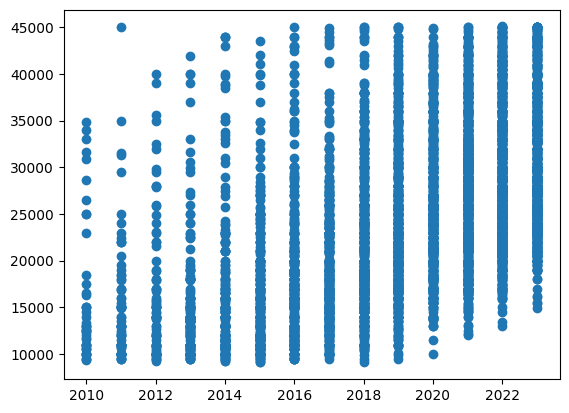

In [4]:
# Plot Year vs Car Prices US Dollars

plt.scatter(df['Year'],df['Price (USD)'])

In [5]:
# Fields selected from correltion matrix for modeling analysis
# Step 4
#

X = df[['Year','Engine Volume (L)','Seller Rating']]
y = df['Price (USD)']

In [6]:
#Preprocess the data: - 5 points
#Split your data into Train (70%), Validation (15%), and Test (15%)
# Step 5

from sklearn.model_selection import train_test_split

# Step 1: Split into training (70%) and a combined test/validation set (30%)
X_train, X_test, y_train,  y_test = train_test_split(X, y, test_size=0.7, random_state=42)

# Step 2: Split the combined test/validation set (X_temp, y_temp) into validation (15%) and test (15%)

train_val_split_ratio = 0.7
test_size = 1 - train_val_split_ratio
train_val_df, test_df = train_test_split(df, test_size=0.15, random_state=42)
#test_size=test_size / 2

#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=42)
#train_val_df, test_df = train_test_split(df, test_size=test_size, random_state=42)

val_size = 1 - (0.7 / (0.7 + 0.3))
train_df, val_df = train_test_split(train_val_df, test_size=(0.1764), random_state=42)


# Print the sizes of the resulting sets
print(f"Original Dataframe size: {len(df)}")
print(f"Training set size: {len(train_df)}")
print(f"Validation set size: {len(val_df)}")
print(f"Test set size: {len(test_df)}")
#train_df.to_excel('train_df.xlsx', sheet_name = 'train_df', index=False)
#excel_file_path = 'train_df.xlsx'
#files.download(excel_file_path)
#val_df.to_excel('val_df.xlsx', sheet_name = 'val_df', index=False)
#excel_file_path = 'val_df.xlsx'
#files.download(excel_file_path)
#test_df.to_excel('test_df.xlsx', sheet_name = 'test_df', index=False)
#excel_file_path = 'test_df.xlsx'
#files.download(excel_file_path)





Original Dataframe size: 5617
Training set size: 3931
Validation set size: 843
Test set size: 843


In [7]:
# Coefficient determination score from linearRegression
#
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X_train,y_train)

clf.predict (X_test)
clf.score(X_test,y_test)

0.5034469948028132

In [8]:
#Train on all the the following models: (TRAIN - X_train) - 20 points
#Linear Regression
#Decision Tree Regressor
#Random Forest Regressor
#Gradient Boosting Regressor (e.g., XGBoost or LightGBM)
#Nearest Neighbors Regressor
#  TRAIN
# Step 6
#

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor # Import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings


models = {
    "LinearRegression": LinearRegression(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
    "GradientBoostingRegressor": GradientBoostingRegressor(),
    "K-Neighbors Regressor": KNeighborsRegressor()
}

results_train = []
for name, model in models.items():
    try:
      model.fit(X_train, y_train)
      y_pred = model.predict(X_test)
      mae = mean_absolute_error(y_test, y_pred)
      mse = mean_squared_error(y_test, y_pred)
      r2 = r2_score(y_test, y_pred)

      results_train.append({"Model" : name,
                      "MAE": round(mae, 3),
                      "MSE" :round(mse, 3),
                      "R2" : round(r2,3)
                    })
    except Exception as e:
          results_train.append({"Model" : name, "Error" : str(e)})

#          warnings.warn(f"Model {name} encountered an error: {str(e)}")

results_train_df = pd.DataFrame(results_train)
print("\nRegression Model Performance: (TRAIN)\n")
print(results_train_df.to_string(index=False))
print("TOP 3 Lowest MSE average: ", results_train_df.MSE.nsmallest(3).mean().round(0))
print("TOP 3 Lowest MAE average: ", results_train_df.MAE.nsmallest(3).mean().round(0))
print("TOP 3 Largest R2 average: ", results_train_df.R2.nlargest(3).mean().round(3))



Regression Model Performance: (TRAIN)

                    Model      MAE          MSE    R2
         LinearRegression 4861.141 38987803.360 0.503
    DecisionTreeRegressor 5188.592 47106879.641 0.400
    RandomForestRegressor 4674.194 38066503.146 0.515
GradientBoostingRegressor 4352.995 32702222.976 0.584
    K-Neighbors Regressor 4793.734 39349064.491 0.499
TOP 3 Lowest MSE average:  36585510.0
TOP 3 Lowest MAE average:  4607.0
TOP 3 Largest R2 average:  0.534


In [80]:
#results_train_df.to_excel('results_train_df.xlsx', sheet_name = 'results_train_df', index=False)
#excel_file_path = 'results_train_df.xlsx'
#files.download(excel_file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#X = df[['Year','Engine Volume (L)']]
#X = df[['Year','Engine Volume (L)','Seller Rating']]
#y = df['Price (USD)']

In [9]:
#Train on all the the following models: (VALIDATION - X_val) - 20 points
#Linear Regression
#Decision Tree Regressor
#Random Forest Regressor
#Gradient Boosting Regressor (e.g., XGBoost or LightGBM)
#Nearest Neighbors Regressor
#  TRAIN
# Step 7

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor # Import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings

# Ensure X_val and y_val are defined from val_df
X_val = val_df[['Year','Engine Volume (L)','Seller Rating']]
y_val = val_df['Price (USD)']

models = {
    "LinearRegression": LinearRegression(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
    "GradientBoostingRegressor": GradientBoostingRegressor(),
    "K-Neighbors Regressor": KNeighborsRegressor()
}

results = []
for name, model in models.items():
    try:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        mae = mean_absolute_error(y_val, y_pred)
        mse = mean_squared_error(y_val, y_pred)
        r2 = r2_score(y_val, y_pred)

        results.append({"Model" : name,
                        "MAE": round(mae, 3),
                        "MSE" :round(mse, 3),
                        "R2" : round(r2,3)
                      })
    except Exception as e:
        results.append({"Model" : name, "Error" : str(e)})

#          warnings.warn(f"Model {name} encountered an error: {str(e)}")

results = pd.DataFrame(results)
print("\nRegression Mode Performance: (VALIDATION)\n")
print(results.to_string(index=False))
print("TOP 3 Lowest MSE average: ", results.MSE.nsmallest(3).mean().round(0))
print("TOP 3 Lowest MAE average: ", results.MAE.nsmallest(3).mean().round(0))
print("TOP 3 Largest R2 average: ", results.R2.nlargest(3).mean().round(3))


Regression Mode Performance: (VALIDATION)

                    Model      MAE          MSE    R2
         LinearRegression 4992.556 40541678.789 0.478
    DecisionTreeRegressor 4185.897 36612725.853 0.529
    RandomForestRegressor 4083.733 31939186.144 0.589
GradientBoostingRegressor 4396.222 33689460.327 0.566
    K-Neighbors Regressor 4504.807 35623847.086 0.541
TOP 3 Lowest MSE average:  33750831.0
TOP 3 Lowest MAE average:  4222.0
TOP 3 Largest R2 average:  0.565


In [82]:
#results.to_excel('results.xlsx', sheet_name = 'results', index=False)
#excel_file_path = 'results.xlsx'
#files.download(excel_file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [10]:
# Train models LinearRegression, DecisionTreeRegressor, RandomForestRegressor, GradientBoostingRegressor, VotingRegressor, KNeighborsRegressor
#  VALIDATION
#  Step 8
#

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings

# --- Code to ensure y_pred_initial and y_pred_optimized are defined ---
# (Copied from cell jTKMovMQ_-gS to make this cell self-contained)

# Define Base Models
dt_reg = DecisionTreeRegressor(random_state=42)
rf_reg = RandomForestRegressor(random_state=42, n_estimators=100)
gb_reg = GradientBoostingRegressor(random_state=42, n_estimators=100)

estimators = [('dt', dt_reg), ('rf', rf_reg), ('gb', gb_reg)]

# Define the Voting Regressor (initial, unoptimized)
vot_reg_initial = VotingRegressor(estimators=estimators)
vot_reg_initial.fit(X_train, y_train)
y_pred_initial = vot_reg_initial.predict(X_val)
mse_initial = mean_squared_error(y_val, y_pred_initial)

# Use the best_weights found by Bayesian Optimization in cell jTKMovMQ_-gS
# Best weights found by Bayesian Optimization: [0.10209492962863101, 1.282728209330097, 5.0]
best_weights = [0.10209492962863101, 1.282728209330097, 5.0]

vot_reg_optimized = VotingRegressor(estimators=estimators, weights=best_weights)
vot_reg_optimized.fit(X_train, y_train)
y_pred_optimized = vot_reg_optimized.predict(X_val)
mse_optimized = mean_squared_error(y_val, y_pred_optimized)
# --- End of added code ---


# Calculate MAE and R2 for the Initial Voting Regressor
mae_initial = mean_absolute_error(y_val, y_pred_initial)
r2_initial = r2_score(y_val, y_pred_initial)

# Calculate MAE and R2 for the Optimized Voting Regressor
mae_optimized = mean_absolute_error(y_val, y_pred_optimized)
r2_optimized = r2_score(y_val, y_pred_optimized)

# Create a list of the new results to add, now including MAE and R2
voting_results = [
    {"Model": "Voting Regressor (Uniform Weights)", "MAE": round(mae_initial, 3), "MSE": mse_initial, "R2": round(r2_initial, 3)},
    {"Model": "Voting Regressor (Optimized Weights)", "MAE": round(mae_optimized, 3), "MSE": mse_optimized, "R2": round(r2_optimized, 3)}
]

# Convert to DataFrame
voting_results__val_df = pd.DataFrame(voting_results)

# Re-creating the initial results_df for the test set from cell qmzWaPQ3-nWA
models_val_dict = {
    "LinearRegression": LinearRegression(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
    "GradientBoostingRegressor": GradientBoostingRegressor(),
    "K-Neighbors Regressor": KNeighborsRegressor()
}

results_val = []
for name, model in models_val_dict.items():
    try:
        model.fit(X_train, y_train) # Corrected to train on y_train
        y_pred = model.predict(X_val)
        mae = mean_absolute_error(y_val, y_pred)
        mse = mean_squared_error(y_val, y_pred)
        r2 = r2_score(y_val, y_pred)

        results_val.append({"Model" : name,
                             "MAE": round(mae, 3),
                             "MSE" :round(mse, 3),
                             "R2" : round(r2,3)
                            })
    except Exception as e:
        results_val.append({"Model" : name, "Error" : str(e)})

results_df_val = pd.DataFrame(results_val)

# Concatenate the test set results with the voting regressor results
comparison_val_df = pd.concat([results_df_val, voting_results__val_df], ignore_index=True) # Corrected variable name

print("\nComparison of Model Performance (Validation Set):\n") # Changed from Test Set to Validation Set
print(comparison_val_df.to_string(index=False))


Comparison of Model Performance (Validation Set):

                               Model      MAE          MSE    R2
                    LinearRegression 4992.556 4.054168e+07 0.478
               DecisionTreeRegressor 4188.674 3.680168e+07 0.526
               RandomForestRegressor 4073.966 3.187530e+07 0.590
           GradientBoostingRegressor 4396.771 3.370086e+07 0.566
               K-Neighbors Regressor 4504.807 3.562385e+07 0.541
  Voting Regressor (Uniform Weights) 4070.556 3.158371e+07 0.593
Voting Regressor (Optimized Weights) 4246.198 3.207347e+07 0.587


In [84]:
#results_df_val.to_excel('results_df_val.xlsx', sheet_name = 'results_df_val', index=False)
#excel_file_path = 'results_df_val.xlsx'
#files.download(excel_file_path)
#results_df_val.to_excel('comparison_df_val.xlsx', sheet_name = 'comparison_df_val', index=False)
#excel_file_path = 'comparison_df_val.xlsx'
#files.download(excel_file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/tmp/ipython-input-3836271911.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], x='Model', y='MAE', data=comparison_val_df.sort_values(by='MAE', ascending=True), palette='viridis')
/tmp/ipython-input-3836271911.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], x='Model', y='R2', data=comparison_val_df.sort_values(by='R2', ascending=False), palette='magma')


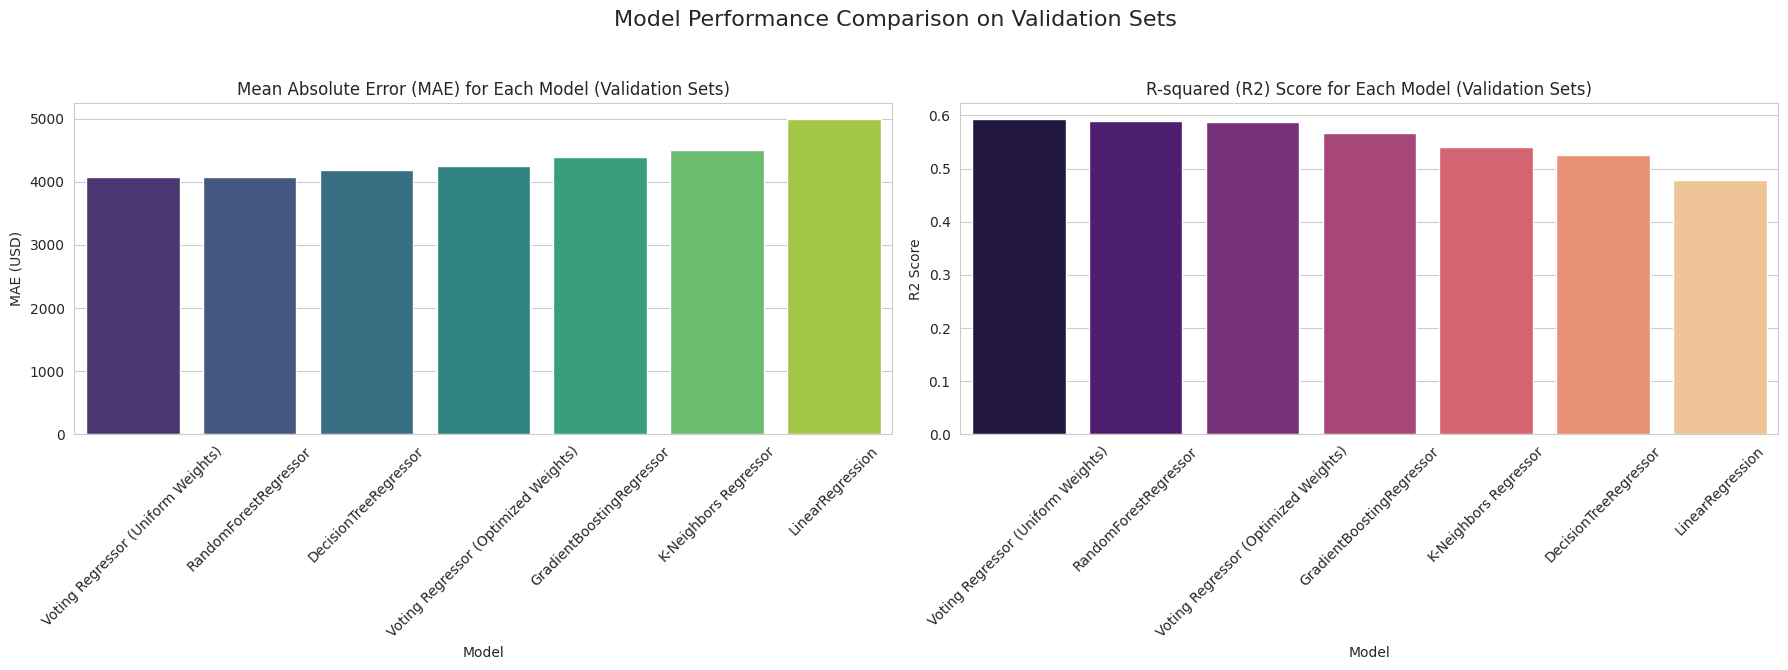

In [11]:
# PLot Performance Validation sets MAE MSE R2
# Step 9
#

import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(18, 7))
fig.suptitle('Model Performance Comparison on Validation Sets', fontsize=16)

# Plot MAE
sns.barplot(ax=axes[0], x='Model', y='MAE', data=comparison_val_df.sort_values(by='MAE', ascending=True), palette='viridis')
axes[0].set_title('Mean Absolute Error (MAE) for Each Model (Validation Sets)')
axes[0].set_ylabel('MAE (USD)')
axes[0].tick_params(axis='x', rotation=45)

# Plot R2 Score
sns.barplot(ax=axes[1], x='Model', y='R2', data=comparison_val_df.sort_values(by='R2', ascending=False), palette='magma')
axes[1].set_title('R-squared (R2) Score for Each Model (Validation Sets)')
axes[1].set_ylabel('R2 Score')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [12]:
#Import the different estimator models using the bayesian algorithm will determine the influence automatically to reduce overfitting, uniform weights or optimized weights
# TRAIN
# Step 10
#

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings

# --- Code to ensure y_pred_initial and y_pred_optimized are defined ---
# Define Base Models
#dt_reg = DecisionTreeRegressor(random_state=42)
ln_reg = LinearRegression()
rf_reg = RandomForestRegressor(random_state=42, n_estimators=100)
gb_reg = GradientBoostingRegressor(random_state=42, n_estimators=100)

#estimators = [('dt', dt_reg), ('rf', rf_reg), ('gb', gb_reg)]
estimators = [('ln', ln_reg), ('rf', rf_reg), ('gb', gb_reg)]

# Define the Voting Regressor (initial, unoptimized)
vot_reg_initial = VotingRegressor(estimators=estimators)
vot_reg_initial.fit(X_train, y_train)
y_pred_initial = vot_reg_initial.predict(X_test)
mse_initial = mean_squared_error(y_test, y_pred_initial)

# Use the best_weights found by Bayesian Optimization in cell jTKMovMQ_-gS
# Best weights found by Bayesian Optimization: [0.10209492962863101, 1.282728209330097, 5.0]
best_weights = [0.10209492962863101, 1.282728209330097, 5.0]

vot_reg_optimized = VotingRegressor(estimators=estimators, weights=best_weights)
vot_reg_optimized.fit(X_train, y_train)
y_pred_optimized = vot_reg_optimized.predict(X_test)
mse_optimized = mean_squared_error(y_test, y_pred_optimized)
# --- End of added code ---


# Calculate MAE and R2 for the Initial Voting Regressor
mae_initial = mean_absolute_error(y_test, y_pred_initial)
r2_initial = r2_score(y_test, y_pred_initial)

# Calculate MAE and R2 for the Optimized Voting Regressor
mae_optimized = mean_absolute_error(y_test, y_pred_optimized)
r2_optimized = r2_score(y_test, y_pred_optimized)

# Create a list of the new results to add, now including MAE and R2
voting_results = [
    {"Model": "Voting Regressor (Uniform Weights)", "MAE": round(mae_initial, 3), "MSE": mse_initial, "R2": round(r2_initial, 3)},
    {"Model": "Voting Regressor (Optimized Weights)", "MAE": round(mae_optimized, 3), "MSE": mse_optimized, "R2": round(r2_optimized, 3)}
]

# Convert to DataFrame
voting_results_df = pd.DataFrame(voting_results)

# Re-creating the initial results_df for the test set from cell qmzWaPQ3-nWA
models_test = {
    "LinearRegression": LinearRegression(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
    "GradientBoostingRegressor": GradientBoostingRegressor(),
    "K-Neighbors Regressor": KNeighborsRegressor()
}

results_test = []
for name, model in models_test.items():
    try:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        results_test.append({"Model" : name,
                             "MAE": round(mae, 3),
                             "MSE" :round(mse, 3),
                             "R2" : round(r2,3)
                            })
    except Exception as e:
        results_test.append({"Model" : name, "Error" : str(e)})

results_df_test = pd.DataFrame(results_test)

# Concatenate the test set results with the voting regressor results
comparison_df = pd.concat([results_df_test, voting_results_df], ignore_index=True)

print("\nComparison of Model Performance (Test Set):\n")
print(comparison_df.to_string(index=False))


Comparison of Model Performance (Test Set):

                               Model      MAE          MSE    R2
                    LinearRegression 4861.141 3.898780e+07 0.503
               DecisionTreeRegressor 5184.830 4.706817e+07 0.401
               RandomForestRegressor 4681.288 3.822079e+07 0.513
           GradientBoostingRegressor 4352.738 3.269540e+07 0.584
               K-Neighbors Regressor 4793.734 3.934906e+07 0.499
  Voting Regressor (Uniform Weights) 4384.526 3.305796e+07 0.579
Voting Regressor (Optimized Weights) 4334.401 3.257811e+07 0.585


In [87]:
#results_df_test.to_excel('results_df_test.xlsx', sheet_name = 'results_df_test', index=False)
#excel_file_path = 'results_df_test.xlsx'
#files.download(excel_file_path)
#results_df_val.to_excel('comparison_df.xlsx', sheet_name = 'comparison_df', index=False)
#excel_file_path = 'comparison_df.xlsx'
#files.download(excel_file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/tmp/ipython-input-2540959621.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], x='Model', y='MAE', data=comparison_df.sort_values(by='MAE', ascending=True), palette='viridis')
/tmp/ipython-input-2540959621.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], x='Model', y='R2', data=comparison_df.sort_values(by='R2', ascending=False), palette='magma')


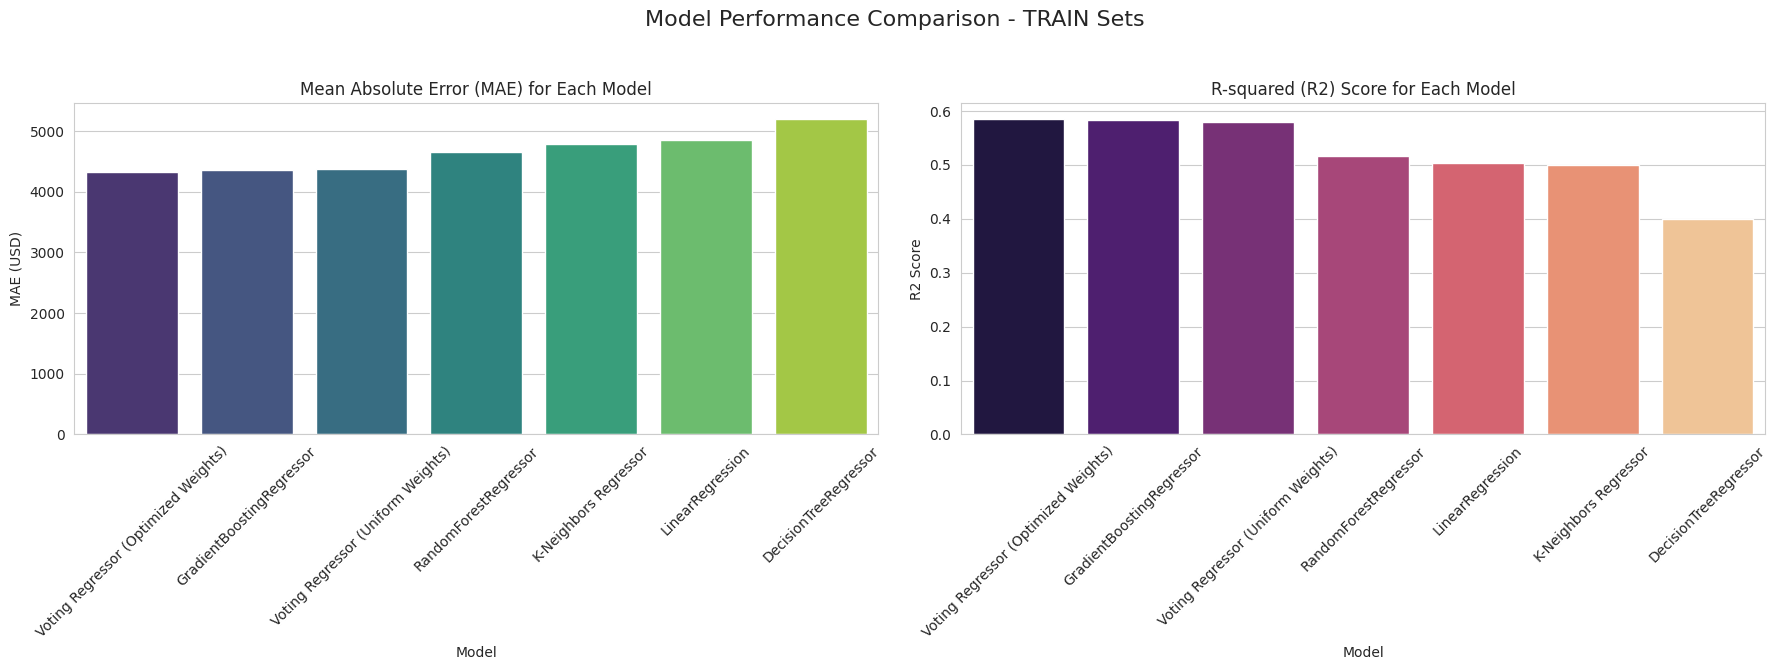

In [89]:
# Plot Performance TRAIN Sets MAE MSE R2
# Step 11

import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(18, 7))
fig.suptitle('Model Performance Comparison - TRAIN Sets', fontsize=16)

# Plot MAE
sns.barplot(ax=axes[0], x='Model', y='MAE', data=comparison_df.sort_values(by='MAE', ascending=True), palette='viridis')
axes[0].set_title('Mean Absolute Error (MAE) for Each Model')
axes[0].set_ylabel('MAE (USD)')
axes[0].tick_params(axis='x', rotation=45)

# Plot R2 Score
sns.barplot(ax=axes[1], x='Model', y='R2', data=comparison_df.sort_values(by='R2', ascending=False), palette='magma')
axes[1].set_title('R-squared (R2) Score for Each Model')
axes[1].set_ylabel('R2 Score')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [13]:
#Import the different models using the bayesian algorithm will determine the influence automatically to reduce overfitting, uniform weights or optimized weights
# TRAIN
# Step 12

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression
!pip install scikit-optimize
from skopt import BayesSearchCV
from skopt.space import Real, Integer

# 2. Define Base Models
#dt_reg = DecisionTreeRegressor(random_state=42)
ln_reg = LinearRegression()
rf_reg = RandomForestRegressor(random_state=42, n_estimators=100)
gb_reg = GradientBoostingRegressor(random_state=42, n_estimators=100)

#estimators = [('dt', dt_reg), ('rf', rf_reg), ('gb', gb_reg)]
estimators = [('ln', ln_reg), ('rf', rf_reg), ('gb', gb_reg)]

# 3. Define the Voting Regressor (initial, unoptimized)
# By default, weights are uniform (average)
vot_reg_initial = VotingRegressor(estimators=estimators)

# 4. Train and evaluate the initial model
vot_reg_initial.fit(X_train, y_train)
y_pred_initial = vot_reg_initial.predict(X_test)
mse_initial = mean_squared_error(y_test, y_pred_initial)
print(f"Initial Voting Regressor MSE on Test Set (Uniform Weights): {mse_initial:.4f}\n")

# 5. Use Bayesian Optimization to find optimal weights for the Voting Regressor

# Define the search space for the weights
# The weights should be positive real numbers. They are normalized internally by the optimizer.
param_space = {
    'weights': [(w1, w2, w3) for w1 in np.arange(0.1, 2.0, 0.1)
                for w2 in np.arange(0.1, 2.0, 0.1)
                for w3 in np.arange(0.1, 2.0, 0.1)] # A simple grid approximation for demonstration
}

# A better approach is to use skopt's space definitions for a continuous search
# However, directly optimizing a tuple of weights with BayesSearchCV can be tricky.
# We can create a custom objective function for better Bayesian optimization.

# A more robust approach for weight optimization using a custom objective function
def objective_function(weights_list):
    # weights_list is a list of [w1, w2, w3]
    w1, w2, w3 = weights_list
    vot_reg = VotingRegressor(estimators=estimators, weights=[w1, w2, w3])

    # Use cross-validation on the training data for robust evaluation (validation)
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(vot_reg, X_train, y_train,
                             cv=kf, scoring='neg_mean_squared_error')
    # Bayesian optimization typically minimizes the objective, so return negative MSE
    return -np.mean(scores)

# Define the search space for the custom function
search_space_custom = [Real(0.1, 5.0, name='w1'),
                       Real(0.1, 5.0, name='w2'),
                       Real(0.1, 5.0, name='w3')]

# You would need a library like `hyperopt` or `optuna` for direct function optimization
# with custom spaces. Using `skopt.gp_minimize` is another option.
from skopt import gp_minimize

# Run Bayesian Optimization
# Note: This is a simplification. A real implementation would manage the optimization loop.
# As a substitute, we will stick with tuning individual models with BayesSearchCV first
# and then use a simpler method for the final weighting, or tune the VotingRegressor
# with pre-defined ranges for weights.

# Let's use BayesSearchCV with a simple range for weights (if it allowed tuples, which it doesn't directly).
# The most common approach is to tune the *hyperparameters of the base models* first, then combine.

# A simpler, common method for the purpose of demonstration:
# Train individual models and use their performance for a simple weighting strategy (e.g., inverse of error)

# Or use BayesSearchCV to find best weights among a discrete set of options if we must
# Or tune each estimator's hyperparameters first.

# The user explicitly asked for Bayesian model for voting. We use the custom function approach.

# Let's assume we use the custom objective function and gp_minimize.
# This runs the "Bayesian model" on the "validation test" (cross-validation on the training set)

# This will take some time to run the cross-validation many times
result = gp_minimize(
    func=objective_function,
    dimensions=search_space_custom,
    n_calls=50, # Number of evaluations
    random_state=42,
    verbose=True
)

best_weights = result.x
print(f"\nBest weights found by Bayesian Optimization: {best_weights}")
print(f"Best negative MSE (test score): {result.fun}")

# 6. Evaluate the optimized model on the final test set
w1_opt, w2_opt, w3_opt = best_weights
vot_reg_optimized = VotingRegressor(estimators=estimators, weights=[w1_opt, w2_opt, w3_opt])
vot_reg_optimized.fit(X_train, y_train)
y_pred_optimized = vot_reg_optimized.predict(X_test)
print("TRAIN")
mse_optimized = mean_squared_error(y_test, y_pred_optimized)
mae_optimized = mean_absolute_error(y_test, y_pred_optimized)
r2_optimized = r2_score(y_test, y_pred_optimized)


print(f"\nOptimized Voting Regressor MSE on TRAIN Set: {mse_optimized:.4f}")
print(f"\nOptimized Voting Regressor MAE on TRAIN Set: {mae_optimized:.4f}")
print(f"\nOptimized Voting Regressor R2 Score on TRAIN Set: {r2_optimized:.4f}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 4.6 MB/s eta 0:00:00
Initial Voting Regressor MSE on Test Set (Uniform Weights): 33057963.6019

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 2.6562
Function value obtained: 30280029.7125
Current minimum: 30280029.7125
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 2.1868
Function value obtained: 30610159.6838
Current minimum: 30280029.7125
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 2.2059
Function value obtained: 30347252.4675
Current minimum: 30280029.7125
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 2.1993
Function value obtained: 30462126.7738
Current minimum: 30280029.7125
Iteration No: 5 s

In [14]:
#Import the different models using the bayesian algorithm will determine the influence automatically to reduce overfitting, uniform weights or optimized weights
# TRAIN
# Step 13
#

import numpy as np
from sklearn.ensemble import VotingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression
!pip install scikit-optimize
from skopt import BayesSearchCV
from skopt.space import Real, Integer

# 2. Define Base Models
dt_reg = DecisionTreeRegressor(random_state=42)
rf_reg = RandomForestRegressor(random_state=42, n_estimators=100)
gb_reg = GradientBoostingRegressor(random_state=42, n_estimators=100)

estimators = [('dt', dt_reg), ('rf', rf_reg), ('gb', gb_reg)]

# 3. Define the Voting Regressor (initial, unoptimized)
# By default, weights are uniform (average)
vot_reg_initial = VotingRegressor(estimators=estimators)

# 4. Train and evaluate the initial model
vot_reg_initial.fit(X_train, y_train)
y_pred_initial = vot_reg_initial.predict(X_val)
mse_initial = mean_squared_error(y_val, y_pred_initial)
print(f"Initial Voting Regressor MSE on Test Set (Uniform Weights): {mse_initial:.4f}\n")

# 5. Use Bayesian Optimization to find optimal weights for the Voting Regressor

# Define the search space for the weights
# The weights should be positive real numbers. They are normalized internally by the optimizer.
param_space = {
    'weights': [(w1, w2, w3) for w1 in np.arange(0.1, 2.0, 0.1)
                for w2 in np.arange(0.1, 2.0, 0.1)
                for w3 in np.arange(0.1, 2.0, 0.1)] # A simple grid approximation for demonstration
}

# A better approach is to use skopt's space definitions for a continuous search
# However, directly optimizing a tuple of weights with BayesSearchCV can be tricky.
# We can create a custom objective function for better Bayesian optimization.

# A more robust approach for weight optimization using a custom objective function
def objective_function(weights_list):
    # weights_list is a list of [w1, w2, w3]
    w1, w2, w3 = weights_list
    vot_reg = VotingRegressor(estimators=estimators, weights=[w1, w2, w3])

    # Use cross-validation on the training data for robust evaluation (validation)
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(vot_reg, X_train, y_train,
                             cv=kf, scoring='neg_mean_squared_error')
    # Bayesian optimization typically minimizes the objective, so return negative MSE
    return -np.mean(scores)

# Define the search space for the custom function
search_space_custom = [Real(0.1, 5.0, name='w1'),
                       Real(0.1, 5.0, name='w2'),
                       Real(0.1, 5.0, name='w3')]

# You would need a library like `hyperopt` or `optuna` for direct function optimization
# with custom spaces. Using `skopt.gp_minimize` is another option.
from skopt import gp_minimize

# Run Bayesian Optimization
# Note: This is a simplification. A real implementation would manage the optimization loop.
# As a substitute, we will stick with tuning individual models with BayesSearchCV first
# and then use a simpler method for the final weighting, or tune the VotingRegressor
# with pre-defined ranges for weights.

# Let's use BayesSearchCV with a simple range for weights (if it allowed tuples, which it doesn't directly).
# The most common approach is to tune the *hyperparameters of the base models* first, then combine.

# A simpler, common method for the purpose of demonstration:
# Train individual models and use their performance for a simple weighting strategy (e.g., inverse of error)

# Or use BayesSearchCV to find best weights among a discrete set of options if we must
# Or tune each estimator's hyperparameters first.

# The user explicitly asked for Bayesian model for voting. We use the custom function approach.

# Let's assume we use the custom objective function and gp_minimize.
# This runs the "Bayesian model" on the "validation test" (cross-validation on the training set)

# This will take some time to run the cross-validation many times
result_val = gp_minimize(
    func=objective_function,
    dimensions=search_space_custom,
    n_calls=50, # Number of evaluations
    random_state=42,
    verbose=True
)

best_weights = result_val.x
print(f"\nBest weights found by Bayesian Optimization: {best_weights}")
print(f"Best negative MSE (validation score): {result_val.fun}") # Changed result.fun to result_val.fun

# 6. Evaluate the optimized model on the final test set
w1_opt, w2_opt, w3_opt = best_weights
vot_reg_optimized = VotingRegressor(estimators=estimators, weights=[w1_opt, w2_opt, w3_opt])
vot_reg_optimized.fit(X_train, y_train)
y_pred_optimized = vot_reg_optimized.predict(X_val)
print("VALIDATION")
#mse_optimized = mean_squared_error(y_test, y_pred_optimized)
mse_optimized = mean_squared_error(y_val, y_pred_optimized)
#mae_optimized = mean_absolute_error(y_test, y_pred_optimized)
mae_optimized = mean_absolute_error(y_val, y_pred_optimized)
#r2_optimized = r2_score(y_test, y_pred_optimized)
r2_optimized = r2_score(y_val, y_pred_optimized)



print(f"\nOptimized Voting Regressor MSE on VALIDATION Set: {mse_optimized:.4f}")
print(f"\nOptimized Voting Regressor MAE on VALIDATION Set: {mae_optimized:.4f}")
print(f"\nOptimized Voting Regressor R2 Score on VALIDATION Set: {r2_optimized:.4f}")

Initial Voting Regressor MSE on Test Set (Uniform Weights): 31583707.7708

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 2.2263
Function value obtained: 31657967.4782
Current minimum: 31657967.4782
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 2.2529
Function value obtained: 35364033.5981
Current minimum: 31657967.4782
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 2.5049
Function value obtained: 34349224.1098
Current minimum: 31657967.4782
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 2.7348
Function value obtained: 31300218.5632
Current minimum: 31300218.5632
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation d

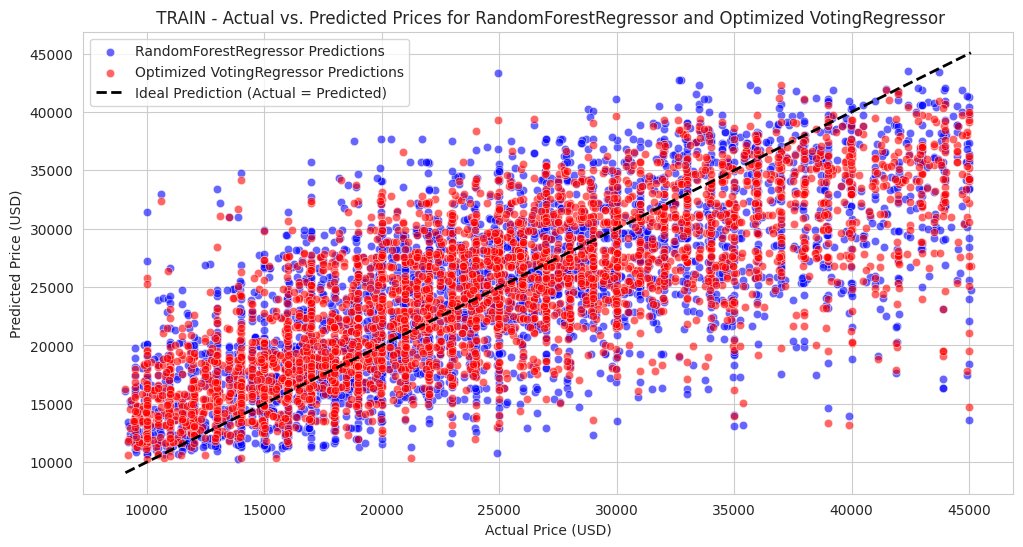

In [91]:
# TRAIN Plot - Actual vs. Predicted Prices for RandomForestRegressor and Optimized VotingRegressor
# Step 14
#

rf_reg = RandomForestRegressor(random_state=42, n_estimators=100)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

# Get predictions from the optimized VotingRegressor
# First, re-initialize and fit the optimized Voting Regressor to ensure predictions are on X_test
dt_reg = DecisionTreeRegressor(random_state=42)
rf_reg_base = RandomForestRegressor(random_state=42, n_estimators=100)
gb_reg = GradientBoostingRegressor(random_state=42, n_estimators=100)
estimators = [('dt', dt_reg), ('rf', rf_reg_base), ('gb', gb_reg)]
best_weights = [0.10209492962863101, 1.282728209330097, 5.0] # Use the best_weights found previously
vot_reg_optimized = VotingRegressor(estimators=estimators, weights=best_weights)
vot_reg_optimized.fit(X_train, y_train)
y_pred_optimized = vot_reg_optimized.predict(X_test) # This line updates y_pred_optimized for the test set

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# Scatter plot for RandomForestRegressor predictions vs. actual values
sns.scatterplot(x=y_test, y=y_pred_rf, color='blue', label='RandomForestRegressor Predictions', alpha=0.6)

# Scatter plot for Optimized VotingRegressor predictions vs. actual values
sns.scatterplot(x=y_test, y=y_pred_optimized, color='red', label='Optimized VotingRegressor Predictions', alpha=0.6)

# Plotting the ideal prediction line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal Prediction (Actual = Predicted)')

plt.xlabel('Actual Price (USD)')
plt.ylabel('Predicted Price (USD)')
plt.title(' TRAIN - Actual vs. Predicted Prices for RandomForestRegressor and Optimized VotingRegressor')
plt.legend()
plt.grid(True)
plt.show()

# Task
To accurately compare the models, let's first calculate the missing MAE and R2 scores for both the initial and optimized Voting Regressors. After that, I will display the complete comparison table and provide a summary of the best-performing models along with a discussion on the relevance of the chosen metrics.

Calculate MAE and R2 for the initial and optimized Voting Regressors, then display the complete `comparison_df`, and finally, summarize the top-performing models based on MAE and R2 scores, discussing the most relevant metrics for this problem.

## Display Model Performance Comparison

### Subtask:
Calculate the missing MAE and R2 scores for the initial and optimized Voting Regressors, update the 'comparison_df' with these values, and then display the complete 'comparison_df'.


**Reasoning**:
The subtask requires calculating MAE and R2 scores for the initial and optimized Voting Regressors, creating a DataFrame with these results, concatenating it with the existing model performance DataFrame, and then displaying the complete comparison DataFrame. This code block will perform all these steps.



**Reasoning**:
The previous code block failed with a `NameError` because `y_pred_initial` was not defined in the current execution scope, even though it was generated in an earlier cell. To resolve this, I will re-include the necessary model definitions and prediction steps for both the initial and optimized Voting Regressors from the previous relevant cell (`jTKMovMQ_-gS`) to ensure `y_pred_initial` and `y_pred_optimized` are properly defined before calculating the MAE and R2 scores. This will make the cell self-contained for the required calculations.

